# chapter02 - 시퀀스 An array of sequences
## 2.1 내장 시퀀스 개요
파이썬은 C로 구현된 다음과 같은 시퀀스를 제공한다.
- *컨테이너 시퀀스* : 서로 다른 자료형의 항목을 담을 수 있는 LIST, TUPLE, COLLECTIONS, DEQUE 형태
- *균일시퀀스* : 하나의 자료형만 담을 수 있는 str, bytes, memoryview, array 형태

> 컨테이너 시퀀스(container sequence)는 객체에 대한 참조를 담으며 객체는 어떠한 자료형도 될 수 있다. 하지만 균일 시퀀스(flat sequence)는 객체에 대한 참조 대신 자신의 메모리 공간에 각 항목의 값을 직접 담는다. 따라서 균일 시퀀스가 메모리를 더 적게 사용하지만, 문자/바이트/숫자 등 기본적인 자료형만 저장할 수 있다.

시퀀스는 다음과 같이 가변성에 따라 분류할 수도 있다.
- *가변 시퀀스* : list, bytearray, array.array, collections.deque, memoryview
- *불변 시퀀스* : tuple, str, bytes

## 2.2 list comprehension & generator expression
### 2.2.1 리스트 컴프리헨션과 가독성

In [3]:
# 예제 2-1 : 문자열에서 유니코드 코드 포인트 리스트 만들기 ver1

symbols = '$¢£¥€¤'
codes = []
for sym in symbols:
    codes.append(ord(sym))
    
codes

[36, 162, 163, 165, 8364, 164]

In [4]:
# 예제2-2 ; 문자열에서 유니코드 코드 포인트 리스트 만들기 ver2
symbols = '$¢£¥€¤'
codes = [ord(sym) for sym in symbols]
codes

[36, 162, 163, 165, 8364, 164]

리스트 컴프리헨션을 사용할 경우 구문이 2줄 이상 넘어가는 경우나 다중 for loop을 사용하는 경우 [예제 2-1]처럼 코드를 분할하는 것이 낫다.

### 2.2.2 리스트 컴프리헨션과 map()/filter() 비교
위의 [예제 2-1], [예제 2-2]를 map(0 filter(0를 사용해서 구현할 수 있다.

In [5]:
# [예제 2-3]
symbols = '$¢£¥€¤'
codes = list(filter(lambda x : x>1, map(ord,symbols)))
codes

[36, 162, 163, 165, 8364, 164]

### 2.2.3 데카르트 곱
리스트 컴프리헨션을 이용해 데카르트 곱(곱집합)에 대해 알아보자
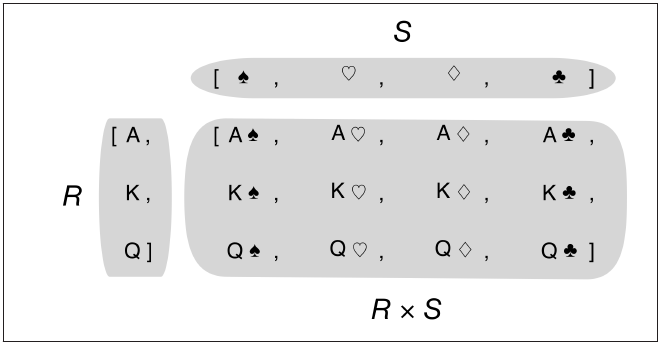
- N * M개

In [7]:
# [예제 2-4]
colors = ['black','white']
sizes = ['s','m','l']
tshirts = [(cl, sz) for cl in colors for sz in sizes]
tshirts

[('black', 's'),
 ('black', 'm'),
 ('black', 'l'),
 ('white', 's'),
 ('white', 'm'),
 ('white', 'l')]

### 2.2.4 generator expression
튜플, 배열 등의 시퀀스를 초기화 하기 위해서는 리스트 컴프리헨션을 사용할 수 있지만, 리스트를 한번에 통째로 만들지 않고, 반복자를 이용하여 항목을 하나씩 생성하는 제너레이터(generator) 표현식을 사용하면 메모리를 더 적게 사용한다.

다른점은 대괄호[]가 아닌 괄호()를 사용한다는 점

In [8]:
symbols ='$¢£¥€¤'
tuple(ord(sym) for sym in symbols)

(36, 162, 163, 165, 8364, 164)

In [11]:
import array
array.array('I', (ord(sym) for sym in symbols)) # 왜한거지

array('I', [36, 162, 163, 165, 8364, 164])

아래의 [예제 2-6]은 데카르트 곱을 제너레이터 표현식을 사용해 [예제 2-4]를 구현한 코드이다. [예제 2-4]와 달리 [예제2-6]은 생성된 리스트의 항목을 메모리에 할당하지 않는다. 제너레이터 표현식은 한번에 한 항목을 생성할 수 있도록 설정되어 있기 때문에 [예제2-6]과 같이 for loop에 데이터를 전달한다. 따라서 따라서, 항목이 많은 리스트를 생성할 때 생길 수 있는 메모리 부족 문제를 해결할 수 있다.


In [10]:
# [예제2-6] : 제너레이터 표현식을 이용한 데카르트 곱

colors = ['black','white']
sizes = ['S', 'M', 'L']
for tshirt in ('%s %s' % (c,s) for c in colors for s in sizes):
    print(tshirt)

black S
black M
black L
white S
white M
white L


## 2.3 튜플은 단순한 불변 리스트가 아니다
튜플은 단순히 *'불변 리스트'*로 사용할 수 있지만, 필드명이 없는 레코드로 사용할 수도 있다.

### 2.3.1 레코드로서의 튜플
- 튜플은 레코드로서 사용될 수 있다.
- 튜플의 각 항목은 레코드 필드 하나를 의미하며
- 항목의 위치가 의미를 결정한다.
- 튜플을 단순히 '불변 리스트'로 생각한다면 경우에 따라 **항목의 크기와 순서**가 중요할 수도 or 아닐수도 있다.
- 하지만 튜플을 필드의 집합으로 사용하는 경우에는 항목 수가 고정되어 있고, 항목의 순서가 중요하다.

In [12]:
# [예제 2-7] : 레코드로 사용된 튜플

lax_coordinates : (33.9425, -118.408056) # LA 국제공항 위경도
city, year, pop, chg, area = ('Tokyo', 2003, 32450, 0.66, 8014) # 도쿄 데이터
traveler_ids = [('USA','31195855'),
               ('BRA', 'CE342567'),
                ('ESP', 'XDA206856')] # (국가코드, 여권번호) 튜플리스트

In [14]:
for passport in sorted(traveler_ids):
#     print('{}/{}'.format(passport))
    # % 포맷 연산자는 튜플을 각 항목의 하나의 필드로 처리함
    print('%s/%s' % passport) 

BRA/CE342567
ESP/XDA206856
USA/31195855


In [15]:
# 언패킹을 이용한 각 항목 가져오기('_'는 dummy variable)
for cty, _ in traveler_ids: 
    print(cty)

USA
BRA
ESP


In [16]:
for cty, num in traveler_ids: # 언패킹을 이용한 각 항목 가져오기('_'는 dummy variable)
    print(cty,num)

USA 31195855
BRA CE342567
ESP XDA206856


### 2.3.2 튜플 언패킹(unpacking)
[예제 2-7]에서 city, year, poop, chg, area 변수에 ('Tokyo', 2003, 32450, 0.66, 8014)을 각각 할당했다.
이런 방법을 *튜플 언패킹*이라고 한다. 언패킹은 반복 가능한 객체라면 어느 객체든 적용할 수 있다.

튜플 언패킹은 **병렬 할당(parallel assignment)**을 할 때 주로 사용한다.

In [ ]:
lax_coordinates = (33.9425, -118.408056)
latitude, longitude = lax_coordinates  # 튜플 언패킹
print(latitude)
print(longitude)

**두 변수의 값을 서로 교환**

In [ ]:
a, b = (1, 2)
print('a =', a, 'b =', b)

# 두 변수 교환하기
b, a = a, b
print('a =', a, 'b =', b)

**(별*)을 붙여 튜플 언패킹**

In [21]:
divmod(20,8) # 몫과 나머지 반환

(2, 4)

In [22]:
t = (20,8)
divmod(*t)

(2, 4)

In [23]:
quotient, remainder = divmod(*t) # 병렬 할당 + 별(*)로 언패킹
quotient, remainder

(2, 4)

In [25]:
import os

path, filename = os.path.split('/chap02/sequences.py')
print(path)  # 경로
print(filename)  # 파일명

/chap02
sequences.py


**나머지 값 별(*) 언패킹 : 리스트 반환**

In [26]:
a, b, *rest = (1, 2, 3, 4, 5)
print(a, b, rest)          # 1 2 [3, 4, 5]

a, b, *rest = range(5)
print(a, b, rest)          # 0 1 [2, 3, 4]

a, b, *rest = range(3)
print(a, b, rest)

a, b, *rest = range(2)
print(a, b, rest)          # 없으면 빈리스트

1 2 [3, 4, 5]
0 1 [2, 3, 4]
0 1 [2]
0 1 []


In [28]:
# 병렬 할당의 경우 *는 단 하나의 변수에만 적용할 수 있다. 
# 대신 * 위치는 어떠한 곳에도 상관이 없다.

*head, b, c = range(5)
print(head, b, c)

a, *body, c = range(5)
print(a, body, c)

[0, 1, 2] 3 4
0 [1, 2, 3] 4


### 2.3.3 튜플 속의 튜플 - Nested tuple unpacking
튜플은 (a, b, (c, d)) 처럼 튜플이 내포된(nested) 형태도 가능하다. 내포된 튜플의 경우도 *변수 할당*만 해주면 잘 언패킹 가능하다.

In [30]:
# [예제 2-8]: longitude에 접근하기 위해 내포된 튜플 언패킹하기

metro_areas = [
    ('Tokyo', 'JP', 36.933, (35.689722, 139.691667)),
    ('Delhi NCR', 'IN', 21.935, (28.613889, 77.208889)), 
    ('Mexico City', 'MX', 20.142, (19.433333, -99.133333)), 
    ('New York-Newark', 'US', 20.104, (40.808611, -74.020386)), 
    ('Sao Paulo', 'BR', 19.649, (-23.547778, -46.635833)),
]

In [34]:
print('{:15} | {:^9} | {:^9}'.format('', 'lat.', 'long.'))
# fmt = '{:15} | {:9.4f} | {:9.4f}'

for name, cty, pop, (lati, long) in metro_areas:
    # 언패킹 된 튜플 중 원하는 변수만 가져다 쓸 수 있다. 
    print('{:15} | {:9.4f} | {:9.4f}'.format(name, lati, long))

                |   lat.    |   long.  
Tokyo           |   35.6897 |  139.6917
Delhi NCR       |   28.6139 |   77.2089
Mexico City     |   19.4333 |  -99.1333
New York-Newark |   40.8086 |  -74.0204
Sao Paulo       |  -23.5478 |  -46.6358


### 2.3.4 Namedtuples
- 튜플은 레코드로 사용하기엔 부족하다.
- 필드에 이름을 붙여야 할 경우에는 collections 모듈의 namedtuple() 함수를 쓸 수 있다.
- collections.namedtuple()함수는 **필드명과 클래스명**을 추가한 튜플의 서브클래스를 생성하는 팩토리 함수이다.
- collections.namedtuple(typename, field_names, verbose=False, rename=False)을 입력값으로 받으며, 
- field_names 를 통해 namedtuple()의 키 즉, 필드명(fieldname)을 정의할 수 있다.

In [35]:
# [예제 2-9] : namedtuple 정의하고 사용
from collections import namedtuple

City = namedtuple('City',['name','country','population','coordinates'])
seoul = City('Seoul','KR',10.204, (37.5668237, 126.9779504))
print(seoul)
print(seoul.population)
print(seoul.coordinates)
print(seoul[1])

City(name='Seoul', country='KR', population=10.204, coordinates=(37.5668237, 126.9779504))
10.204
(37.5668237, 126.9779504)
KR


namedtuple()의 몇가지 속성들
    1. _fields : 클래스의 필드명을 담고 있는 튜플을 반환
    2. _make() : 반복형 객체로부터 namedtuple 만들기
    3. _asdict() : namedtuple에서 만들어진 collections.OrderDict객체 반환

In [36]:
# [예제 2-10] : _fields 클래스 속성, _make(iterable) 클래스 메소드, _asdict() 객체 메소드

print(City._fields)

('name', 'country', 'population', 'coordinates')


In [37]:
LatLong = namedtuple('LatLong',['lat','long'])
delhi_data = ('Delhi NCR', 'INDIA', 21.93, LatLong(28.613889, 77.208889))
delhi = City._make(delhi_data)
print(delhi._asdict)

<bound method City._asdict of City(name='Delhi NCR', country='INDIA', population=21.93, coordinates=LatLong(lat=28.613889, long=77.208889))>


In [38]:
delhi._asdict().items()

odict_items([('name', 'Delhi NCR'), ('country', 'INDIA'), ('population', 21.93), ('coordinates', LatLong(lat=28.613889, long=77.208889))])

In [39]:
for k,v in delhi._asdict().items():
    print(k + ':', v)

name: Delhi NCR
country: INDIA
population: 21.93
coordinates: LatLong(lat=28.613889, long=77.208889)


In [ ]:
## 2.4 슬라이싱(slicing)
### 2.4.1 생략
### 2.4.2. 슬라이싱 객체
- 슬라이싱 sl[a:b:c]에서 c는 보폭(stride)만큼씩 항목을 건너뛰게 한다.
- c < 0(음수)인 경우에는 거꾸로 거슬러 항목을 반환한다.
- a:b:c 표기법은 인덱스 연산을 수행하는 [] 안에서만 가능하다.
- seq[start : end : step]

In [40]:
s = 'bicycle'

print('s[::3] =',s[::3])     # step=3까지만 나타내겠다.
print('s[::-1] =', s[::-1])  # 반대로 
print('s[::-2] =', s[::-2])  # 반대로 2칸씩 건너뛰며 출력

s[::3] = bye
s[::-1] = elcycib
s[::-2] = eccb


일관된 데이터 형식에서 하드코딩 하는 대신 **슬라이스에 이름을 붙여 가독성을 높일 수 있다.**

In [43]:
# [예제 2-11] : 슬라이싱에 이름 붙이기

invoice = """
0.....6.................................40........52...55........
1909  Pimoroni PiBrella                     $17.50    3    $52.50
1489  6mm Tactile Switch x20                $4.95     2    $9.90
1510  Panavise Jr. - PV-201                 $28.00    1    $28.00
1601  PiTFT Mini Kit 320x240                $34.95    1    $34.95
"""

In [45]:
# 열이름을 지정해보자
sku = slice(0,6)
description = slice(6,40)
unit_price = slice(40,52)
quantity = slice(52,55)
item_total = slice(55,None)

line_split = invoice.split('\n')[2:] # 본문만 가져오겠다

In [44]:
invoice.split('\n')

['',
 '0.....6.................................40........52...55........',
 '1909  Pimoroni PiBrella                     $17.50    3    $52.50',
 '1489  6mm Tactile Switch x20                $4.95     2    $9.90',
 '1510  Panavise Jr. - PV-201                 $28.00    1    $28.00',
 '1601  PiTFT Mini Kit 320x240                $34.95    1    $34.95',
 '']

In [47]:
for item in line_split:
    # 마치 '열'처럼 이름이 붙은 것만 특정해서 가져올 수 있다.
    print(item[unit_price], item[description]) 

    $17.50   Pimoroni PiBrella                 
    $4.95    6mm Tactile Switch x20            
    $28.00   Panavise Jr. - PV-201             
    $34.95   PiTFT Mini Kit 320x240            
 


### 2.4.3 다차원 슬라이싱과 생략 기호
- []연산자는 콤마로 구분해서 여러 개의 인덱스나 슬라이스를 가질 수 있다.
- 대표적으로 numpy 모듈에서 n-차원의 데이터를 슬라이싱 할 때 사용한다.
- a[i, j] --> a[m:n, k:1] 형태와 같이 2차원 데이터를 슬라이싱 할 때 사용
- $$ M = \left[\begin{array}{rrr} 
1&4&7\\
2&5&6\\
3&8&9
\end{array}\right]$$ 을 슬라이싱해서 1열 [1,2,3]을 뽑아보자

In [48]:
import numpy as np

M = np.array([[1, 4, 7], 
              [2, 5, 8], 
              [3, 6, 9]])

M_col = M[:, 0]
M_col

array([1, 2, 3])

In [ ]:
### 2.4.4 슬라이스에 할당하기
슬라이스 표기법이나 del을 이용하여 가변 시퀀스를 연결/삭제/변경 할 수 있다.

In [49]:
l = list(range(10))
l

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [50]:
l[2:5] = [20, 30]  # 2, 3 인덱스를 20, 30으로 바꾸고 4번째 인덱스의 값은 제거
l

[0, 1, 20, 30, 5, 6, 7, 8, 9]

In [51]:
del l[5:7]  # 5, 6 인덱스 제거
l

[0, 1, 20, 30, 5, 8, 9]

In [52]:
l[3::2] = [11, 22] # 3번 인덱스부터 2칸씩 점프한 [30,8]값을 [11,12]로 변경
l

[0, 1, 20, 11, 5, 22, 9]

In [53]:
# 할당문의 대상이 슬라이스인 경우, 항목 하나만 할당하는 경우에도 할당문 오른쪽에는 반복 가능한 객체가 와야한다.
l[2:5] = 100   # 오류

TypeError: can only assign an iterable

In [55]:
l[2:5] = [100] # 성공
l

[0, 1, 100]

In [ ]:
## 2.5 시퀀스에 덧셈 및 곱셈 연산자 사용하기
### 2.5.1. 리스트의 리스트

In [56]:
board = [['_']*3 for i in range(3)]
board

[['_', '_', '_'], ['_', '_', '_'], ['_', '_', '_']]

In [57]:
board[1]

['_', '_', '_']

In [59]:
board[1][2] = 'X'
board

[['_', '_', '_'], ['_', '_', 'X'], ['_', '_', '_']]

In [60]:
# 리스트에 정수를 곱해 다음과 같이 나타낼수도 있다. 
# 다만, 특정 인덱스에 값을 넣어줄 경우 예상치 못한 결과가 나옴

weird = [['_']*3]*3    # 여기까진 정상
weird

[['_', '_', '_'], ['_', '_', '_'], ['_', '_', '_']]

In [61]:
weird[1][2] = 'X'      # 'X'가 다 생김. 리스트 안의 리스트가 동일한 참조를 가지니까 
weird

[['_', '_', 'X'], ['_', '_', 'X'], ['_', '_', 'X']]

In [62]:
# 리스트 컴프리헨션을 풀어서 쓴 경우
board = []
for i in range(3):
    row = ['_'] * 3
    board.append(row)

print(board)

board[1][2] = 'X'
print(board)

[['_', '_', '_'], ['_', '_', '_'], ['_', '_', '_']]
[['_', '_', '_'], ['_', '_', 'X'], ['_', '_', '_']]


In [63]:
# 리스트 * 정수를 풀어서 쓴 경우
row = ['_'] * 3
weird_board = []
for i in range(3):
    weird_board.append(row)
    
print(weird_board)

weird_board[1][2] = 'X'
weird_board

[['_', '_', '_'], ['_', '_', '_'], ['_', '_', '_']]


[['_', '_', 'X'], ['_', '_', 'X'], ['_', '_', 'X']]

## 2.6 시퀀스의 복합할당 +=, *=
- += 연산자가 동작할 수 있는 특별 메서드는 __iadd__()이다.
- 없을 경우 __add__()메서드를 대신 호출한다.
- *= 연산자가 동작할 수 있는 특별 메서드는 __imul__()이다.

- list, bytearray, array 등과 같은 **가변 시퀀스**는 +=, *= 가능하지만
- tuple 과 같은 **불변 시퀀스**는 __add__()메서드가 대신 호출된다.

In [ ]:
print('list는 __iadd__()를 가지고 있는가? :', 
      '__iadd__' in dir(list))

print('tuple은 __iadd__()를 가지고 있는가? :', 
      '__iadd__' in dir(tuple))

아래의 예제는 리스트와 튜플에 *=를 적용한 예제이다. 아래의 코드에서 `__id__()` 는 파이썬의 내장함수이며, 반환되는 숫자는 해당 객체의 메모리 주소를 의미한다.

예제에서도 확인할 수 있듯이 리스트는 __iadd__()를 가지고 있으므로, 해당 변수를 직접 변경하여 메모리 주소가 그대로지만, 튜플은 __add__()를 호출하므로 새로운 튜플 객체가 만들어 진다.

In [65]:
# list에 *= 적용
l = [1, 2, 3]
print('*=을 적용하기 전 l의 id :', id(l))

l *= 2
print('*= 적용 결과 :', l)
print('*=을 적용한 후 l의 id :', id(l))

# tuple에 *= 적용
t = (1, 2, 3)
print('\n')
print('*=을 적용하기 전 t의 id :', id(t))

t *= 2
print('*= 적용 결과 :', t)
print('*=을 적용한 후 l의 id :', id(t))

*=을 적용하기 전 l의 id : 4429880136
*= 적용 결과 : [1, 2, 3, 1, 2, 3]
*=을 적용한 후 l의 id : 4429880136


*=을 적용하기 전 t의 id : 4416691008
*= 적용 결과 : (1, 2, 3, 1, 2, 3)
*=을 적용한 후 l의 id : 4453990952


## 2.7 list.sort()와 sorted()
생략

## 2.8 정렬된 시퀀스를 bisect로 관리하기
bisect모듈은 bisect()와 insort()함수를 제공한다.
- `bisect()`: 이진 검색 알고리즘을 이용해서 시퀀스 검색
- `insort()`: 정렬된 시퀀스 안에 항목을 삽입
    
### 2.8.1 bisect()로 검색
- 위치를 반환함
- 정렬된 시퀀스인 HAYSTACK에 시퀀스 NEEDLES의 아이템들을 bisect 함수를 이용해 추가해 줄 위치를 찾아내는 코드
- bisect함수는 bisect_left, bisect_right(bisect) 두 가지가 있다.
- 추가할 항목(아이템)의 위치를 기존 항목 왼쪽(앞, left)에 추가할건지 오른쪽(뒤, right)에 추가할 건지에 따라 다르다.
- bisect_right(bisect)
    - `bisect.bisect(a, x, lo=0, hi=len(a))`
    - `a`는 오름차순이어야 하며, 오름차순으로 정렬된 시퀀스 `a`에 `x`값이 들어갈 **위치**를 반환한다.
    - `x`와 동일한 값이 시퀀스 `a`에 존재할 때  `x`와 **동일한 값 바로 뒤** 반환
    - `lo`, `hi`를 통해 검색하는 시퀀스의 영역으로 늘이거나 줄일 수 있지만 기본적으로 시퀀스 전체를 범위로 한다.
    
- bisect_left()
    - bisect_left()는 `x`와 **동일한 값**의 위치를 리턴

In [78]:
import bisect
seq = [1,3,4,5]
print(bisect.bisect(seq, 2)) # 1일 듯 -- 정답!

1


In [79]:
seq = [1,3,4,5]

# right : 바로 뒤
print(bisect.bisect_right(seq, 3)) # 2?
print(bisect.bisect_left(seq,3))   # 1?

2
1


In [66]:
import bisect
import sys

HAYSTACK = [1, 4, 5, 6, 8, 12, 15, 20, 21, 23, 23, 26, 29, 30] # 바뀔 대상
NEEDLES  = [0, 1, 2, 5, 8, 10, 22, 23, 29, 30, 31]             #

ROW_FMT = '{0:2d} @ {1:2d}    {2}{0:<2d}'

def demo(bisect_fn):
    for needle in reversed(NEEDLES):
        position = bisect_fn(HAYSTACK, needle)  # 2. bisect함수 사용
        offset = position * '  |'  
        print(ROW_FMT.format(needle, position, offset))
        

if __name__ == '__main__':
    if sys.argv[-1] == 'left':  # 1. 삽입 위치를 찾기위한 bisect 함수 선택
        bisect_fn = bisect.bisect_left
    else:
        bisect_fn = bisect.bisect  # == bisect.bisect_right
        
    print('DEMO:', bisect_fn.__name__)
    print('haystack ->', ' '.join('%2d' % n for n in HAYSTACK))
    demo(bisect_fn)

DEMO: bisect
haystack ->  1  4  5  6  8 12 15 20 21 23 23 26 29 30
31 @ 14      |  |  |  |  |  |  |  |  |  |  |  |  |  |31
30 @ 14      |  |  |  |  |  |  |  |  |  |  |  |  |  |30
29 @ 13      |  |  |  |  |  |  |  |  |  |  |  |  |29
23 @ 11      |  |  |  |  |  |  |  |  |  |  |23
22 @  9      |  |  |  |  |  |  |  |  |22
10 @  5      |  |  |  |  |10
 8 @  5      |  |  |  |  |8 
 5 @  3      |  |  |5 
 2 @  1      |2 
 1 @  1      |1 
 0 @  0    0 


> bisect()함수는 numeric lookup 테이블로 사용하기 유용하다.  
> 출처 : https://docs.python.org/ko/3.9/library/bisect.html

In [ ]:
# [예제 2-12] : 시험 점수를 입력받아 bisect() 함수를 이용해 A~F까지 등급을 반환
# 90 and up is an ‘A’, 80 to 89 is a ‘B’, and so on:

In [76]:
breakpoints = [60,70,80,90]
grades = 'FDCBA'
testnum1 = bisect.bisect(breakpoints, 97)
print(testnum1) # 인덱스는 4 --> 왜? 3번 인덱스인 '90'보다 큰 수이니까 4번이 되지
grades[testnum1]

testnum2 = bisect.bisect(breakpoints, 65)
print(testnum2) # 인덱스는 1 --> 왜? 0번 인덱스인 '60'보다 큰 수니까 바로 뒤인 1

testnum3 = bisect.bisect(breakpoints, 44)
print(testnum3) # 인덱스는 0 --> 왜? 0번 인덱스인 '60'보다 작으니까 새로운 0번이 되고, '60'은 1번 인덱스로 밀림

4
1
0


In [68]:
def grade(score, breakpoints=[60, 70, 80, 90], grades='FDCBA'):
    idx = bisect.bisect(breakpoints, score)
    return grades[idx]

In [77]:
[grade(sc) for sc in [33, 99, 77, 70, 89, 90, 100]]

['F', 'A', 'C', 'C', 'B', 'A', 'A']

### 2.8.2 bisect.insort()로 삽입하기
- 시퀀스를 오름차순으로 유지한 채로 항목(item)을 삽입할 수 있다.
- `bisect.insort(a, x, lo=0, hi=len(a))`
- insort()의 `a`는 오름차순이어야 하며, 오름차순으로 정렬된 시퀀스 `a`에 `x`값을 삽입한다.
- insort_right()은 `x`와 동일한 값이 시퀀스 `a`에 존재할 때  `x`와 **동일한 값 바로 뒤** 삽입
- insort_left()는 `x`와 **동일한 값**의 위치에 삽입

In [80]:
seq = [1,3,4,5]
bisect.insort(seq, 2) 
print(seq)

[1, 2, 3, 4, 5]


In [85]:
import random

size = 7
random.seed(1729)

my_li = []
for i in range(size):
    new = random.randrange(size*2)
#     print(new)
    bisect.insort(my_li, new)
    print('%2d ->' % new, my_li)

10 -> [10]
 0 -> [0, 10]
 6 -> [0, 6, 10]
 8 -> [0, 6, 8, 10]
 7 -> [0, 6, 7, 8, 10]
 2 -> [0, 2, 6, 7, 8, 10]
10 -> [0, 2, 6, 7, 8, 10, 10]


## 2.9 리스트가 답이 아닐 때
### 2.9.1 배열
리스트 안에 숫자만 있다면 배열이 훨씬 효율적이다.
- pop(), insert(), extend() 뿐만 아니라 
- 빠르게 파일에 저장하고 읽을 수 있는 frombytes(), tofile() 메서드도 제공한다.
- 교재에서는 float()함수를 이용해 텍스트 파일에서 숫자를 읽어오는 거보다 60배 정도 빠르다고 한다. array.tofile() 메소드로 저장하는 것은 7배 빠르다고 한다.

In [91]:
# [예제 2-13] : 천만 개의 랜덤한 실수로 이뤄진 배열을 생성한 뒤 저장-->로딩 하는 코드
%%time
from array import array
from random import random

# 생성
floats = array('d',(random() for i in range(10**7)))
print('float[-1] :', floats[-1])

# tofile저장
with open('./floats.bin', 'wb') as f:
    floats.tofile(f)

UsageError: Line magic function `%%timeit` not found.


In [93]:
%%time

# frombytes 로드
floats2 = array('d')
with open('./floats.bin', 'rb') as f:
    floats2.fromfile(f, 10**7)
    
print('floats2[-1] :', floats2[-1])
print('floats == floats :', floats2 == floats)

TypeError: 'module' object is not callable

### 2.9.2 메모리뷰
메모리뷰 클래스는 공유 메모리 시퀀스형이며 bytes를 복사하지 않고 배열의 슬라이스를 다룰 수 있다.
- '언제 메모리 뷰를 사용하나??'
- PIL 이미지, SQLite 데이터베이스, NumPy 배열 등 데이터 구조체를 복사하지 않고 메모리를 공유할 수 있게 해준다. 데이터셋이 커지는 경우 유용하다.
- memoryview.cast() 메서드는 array 모듈과 비슷한 기능을 하며, 동일한 메모리를 공유한다.

실제로 memoryview가 동일한 메모리를 공유하는지 id()함수를 이용해 배열의 항목 주소가 같은지 출력해보고, memoryview의 값을 변경했을 경우 동일하게 변경되는지 확인해보자

In [94]:
import array

num = array.array('h', [-2,-1,0,1,2]) # h : signed short
memv = memoryview(num) # 메모리 공유됨

print('len(memv) :', len(memv))
print('id(memv) == id(num) :', id(memv[0]) == id(num[0])) # id : 주소 확인

len(memv) : 5
id(memv) == id(num) : True


In [95]:
# memeryview 값을 변경해보자
memv[0] = 2222

# num도 함께 변경됐는지 확인해보자
print(num)

array('h', [2222, -1, 0, 1, 2])


## 2.10 정리
끝

# +) array.array
- array 클래스를 이용해 동일한 타입값(typecode)으로 인스턴스 생성
- array.array( *typecode, [, initializer])
- typecode(아래)
- 출처 : [docs.python.array](https://docs.python.org/ko/3/library/array.html)
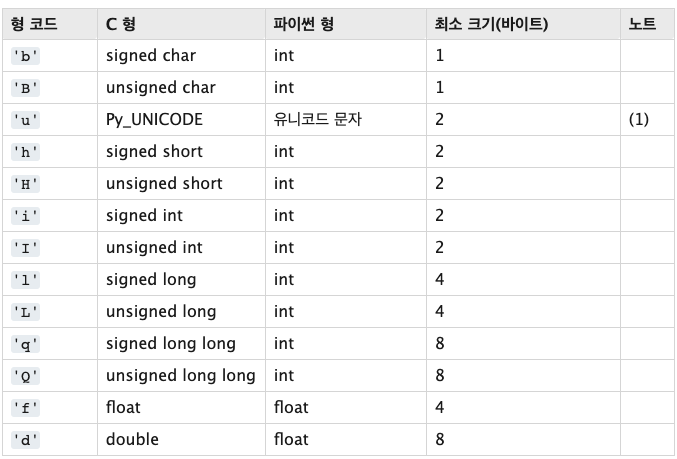

정리
- 배열 객체가 문자열로 변환될 때, `array(typecode, initializer)`로 표현된다.
- 배열이 비어 있으면 *initializer*가 생략되고, 
- 그렇지 않으면 *typecode*가 `u`인 경우 **문자열**이 되고, 그렇지 않으면 **숫자 리스트**
- 문자열은 `eval()`을 사용하여 같은 형과 값을 갖는 배열로 다시 변환된다.

In [18]:
from array import array
print(array('l'))
print(array('u', 'hello \u2641'))
print(array('l', [1, 2, 3, 4, 5]))
print(array('d', [1.0, 2.0, 3.14]))

array('l')
array('u', 'hello ♁')
array('l', [1, 2, 3, 4, 5])
array('d', [1.0, 2.0, 3.14])


### list vs array.array 메모리 사용량 비교
그렇다면 배열을 만들 때 list와 array의 차이는 무엇?
- list
    - 크기가 가변적
    - 어떤 원소 타입이던 저장 가능
    - 단, 메모리 더 많이 필요
- array
    - 같은 타입 원소만 저장
    - 메모리를 훨씬 적게 씀
    - 사실 array.array보다 Numpy를 쓰는게 낫다.

In [20]:
import array
import resource

startMem = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss

# list
mylist = []
for i in range(1,100000):
    mylist.append(i)

listMem = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss

# array
myarray = array.array('i')
for i in range(1,100000):
    myarray.append(i)

arrayMem = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss

print("list를 만드는 데는 :", listMem-startMem)
print("array를 만드는 데는 : ", arrayMem-listMem)

list를 만드는 데는 : 819200
array를 만드는 데는 :  421888


> 실행할 때마다 차이는 있지만 list가 array보다 메모리가 크다